# Credit Risk Classifier - Data Preprocessing

----

### The Data

We will be using a subset of the LendingClub data set obtained from Kaggle. The original dataset can be found at: https://www.kaggle.com/wordsforthewise/lending-club. The "loan_status" column contains our label (or classes used for the classification task). **NOTE: We are working with a special version of this data set that has some extra feature engineering requirements.**

### Background

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Project Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. We will use typical classification metrics when evaluating the performance of our model.

----

## Data Overview

There are many LendingClub data sets on Kaggle. Here is a table describing the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

In [1]:
# load all the libraries and packages used in this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# configure user settings
%config Completer.use_jedi = False

In [3]:
# read in the original data set
df = pd.read_csv('./data/lending_club_loan_two.csv')
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [4]:
# This is our target: we will be building a model to try and predict "fully paid" (good) or "charged off" (bad).
# Therefore we will use a binary classification approach
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [7]:
100 * (276.0/len(df['revol_util']))

0.06969169002348306

In [8]:
df['revol_util'].mean()

53.79174863677942

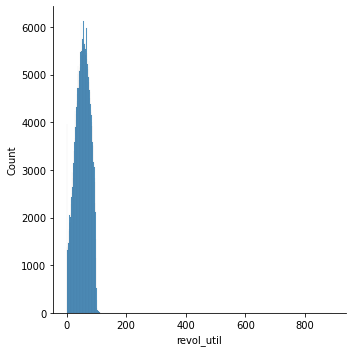

In [9]:
sns.displot(x='revol_util', data=df);

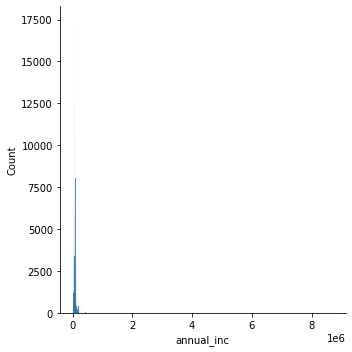

In [10]:
sns.displot(x='annual_inc', data=df);

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [12]:
df['revol_util'].nlargest(20)

137211    892.3
329037    153.0
82600     152.5
65687     150.7
350333    148.0
165111    146.1
312268    145.8
296174    140.4
108246    136.7
211426    132.1
153970    129.5
16793     129.4
391865    128.1
51619     127.6
319308    127.6
75751     127.4
257697    124.7
335489    123.3
130785    123.2
266203    123.2
Name: revol_util, dtype: float64

In [13]:
df.iloc[137211]

loan_amnt                                                     3500.0
term                                                       36 months
int_rate                                                       12.49
installment                                                   117.08
grade                                                              B
sub_grade                                                         B4
emp_title                                             Budget Analyst
emp_length                                                 10+ years
home_ownership                                                  RENT
annual_inc                                                   45000.0
verification_status                                         Verified
issue_d                                                     Apr-2014
loan_status                                               Fully Paid
purpose                                           debt_consolidation
title                             

In [14]:
df['annual_inc'].nlargest(100)

308700    8706582.0
318255    7600000.0
100370    7446395.0
376306    7141778.0
100946    7000000.0
            ...    
119450     920000.0
395097     920000.0
226245     900009.0
5158       900000.0
124962     900000.0
Name: annual_inc, Length: 100, dtype: float64

254 0.06413655531146631 %


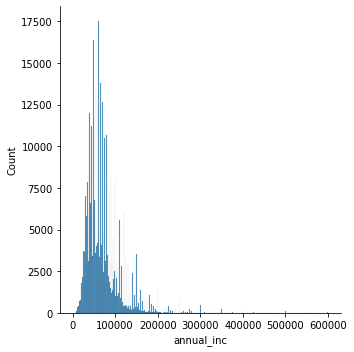

In [15]:
# CLEANING #1: DROP OUTLIER INCOMES (<1% OF OBSERVATIONS)
income_limit = 600000
df_less_income = df[df['annual_inc'] <= income_limit]
n_lost = len(df) - len(df_less_income)
print(n_lost, 100*n_lost/len(df), '%')

sns.displot(x='annual_inc', data=df_less_income);

In [16]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [17]:
df_less_income['home_ownership'].value_counts()

MORTGAGE    198184
RENT        159738
OWN          37708
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [18]:
df_less_income.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22912
emp_length              18297
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                275
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37756
pub_rec_bankruptcies      534
address                     0
dtype: int64

In [19]:
df['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [20]:
df_less_income['mort_acc'].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [21]:
df[df['home_ownership'] == 'RENT']['mort_acc'].unique()

array([ 0.,  3.,  4., nan,  5.,  1.,  6.,  2.,  7., 11.,  8.,  9., 10.,
       12., 14., 16., 13., 17., 15., 20., 30., 18., 19.])

In [22]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.])

In [23]:
df['title'].value_counts()

Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
                            ...  
MortyFree                       1
Get Out Of Debt NOW             1
Summer 2013 Moving              1
Wedding Load                    1
Loan20                          1
Name: title, Length: 48817, dtype: int64

In [24]:
df[ df['emp_title'].isnull() ]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
35,5375.0,36 months,13.11,181.39,B,B4,NaN,NaN,RENT,34000.00,...,9.0,1.0,14998.0,88.7,20.0,f,INDIVIDUAL,5.0,1.0,"23617 Michael Viaduct\r\nWest John, MS 05113"
36,3250.0,36 months,16.78,115.52,C,C5,NaN,NaN,RENT,22500.00,...,7.0,0.0,7587.0,54.6,7.0,f,INDIVIDUAL,0.0,0.0,"361 Erica Forest\r\nLake Mariaton, TN 30723"
40,35000.0,60 months,16.99,869.66,D,D1,NaN,4 years,MORTGAGE,130000.00,...,10.0,0.0,34130.0,53.8,27.0,f,INDIVIDUAL,10.0,0.0,"8268 Reed Gardens Suite 996\r\nEast Johnmouth,..."
49,15000.0,36 months,7.89,469.29,A,A5,NaN,NaN,MORTGAGE,90000.00,...,7.0,0.0,8205.0,93.2,18.0,w,INDIVIDUAL,6.0,0.0,"84009 David Stream\r\nSouth Nicolehaven, IL 05113"
58,10000.0,36 months,17.56,359.33,D,D1,NaN,NaN,MORTGAGE,32000.00,...,6.0,0.0,11615.0,82.4,7.0,w,INDIVIDUAL,0.0,0.0,"965 Spencer Courts\r\nPacetown, AZ 00813"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395946,35000.0,60 months,16.20,854.86,C,C4,NaN,NaN,MORTGAGE,84000.00,...,7.0,0.0,4241.0,18.8,21.0,w,INDIVIDUAL,5.0,0.0,"2645 Wayne Street\r\nMarymouth, HI 22690"
395963,7000.0,36 months,20.20,260.86,E,E3,NaN,NaN,OWN,32964.00,...,24.0,1.0,3236.0,9.7,44.0,w,INDIVIDUAL,0.0,1.0,8339 Daniel Forges Suite 273\r\nPort Oscarmout...
395988,35000.0,60 months,15.59,843.53,D,D1,NaN,NaN,OWN,102396.00,...,15.0,0.0,31665.0,32.4,33.0,w,INDIVIDUAL,1.0,0.0,"114 Sonya Pass\r\nCarlamouth, SD 00813"
395999,11125.0,36 months,24.11,437.11,F,F2,NaN,NaN,MORTGAGE,31789.88,...,8.0,0.0,22385.0,81.0,24.0,w,INDIVIDUAL,4.0,0.0,"1314 Bridget Terrace\r\nRebeccashire, NE 30723"


In [25]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [26]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [218]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

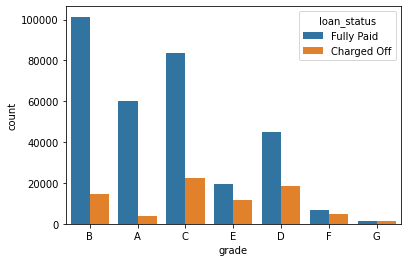

In [219]:
sns.countplot(data=df, x='grade', hue='loan_status');

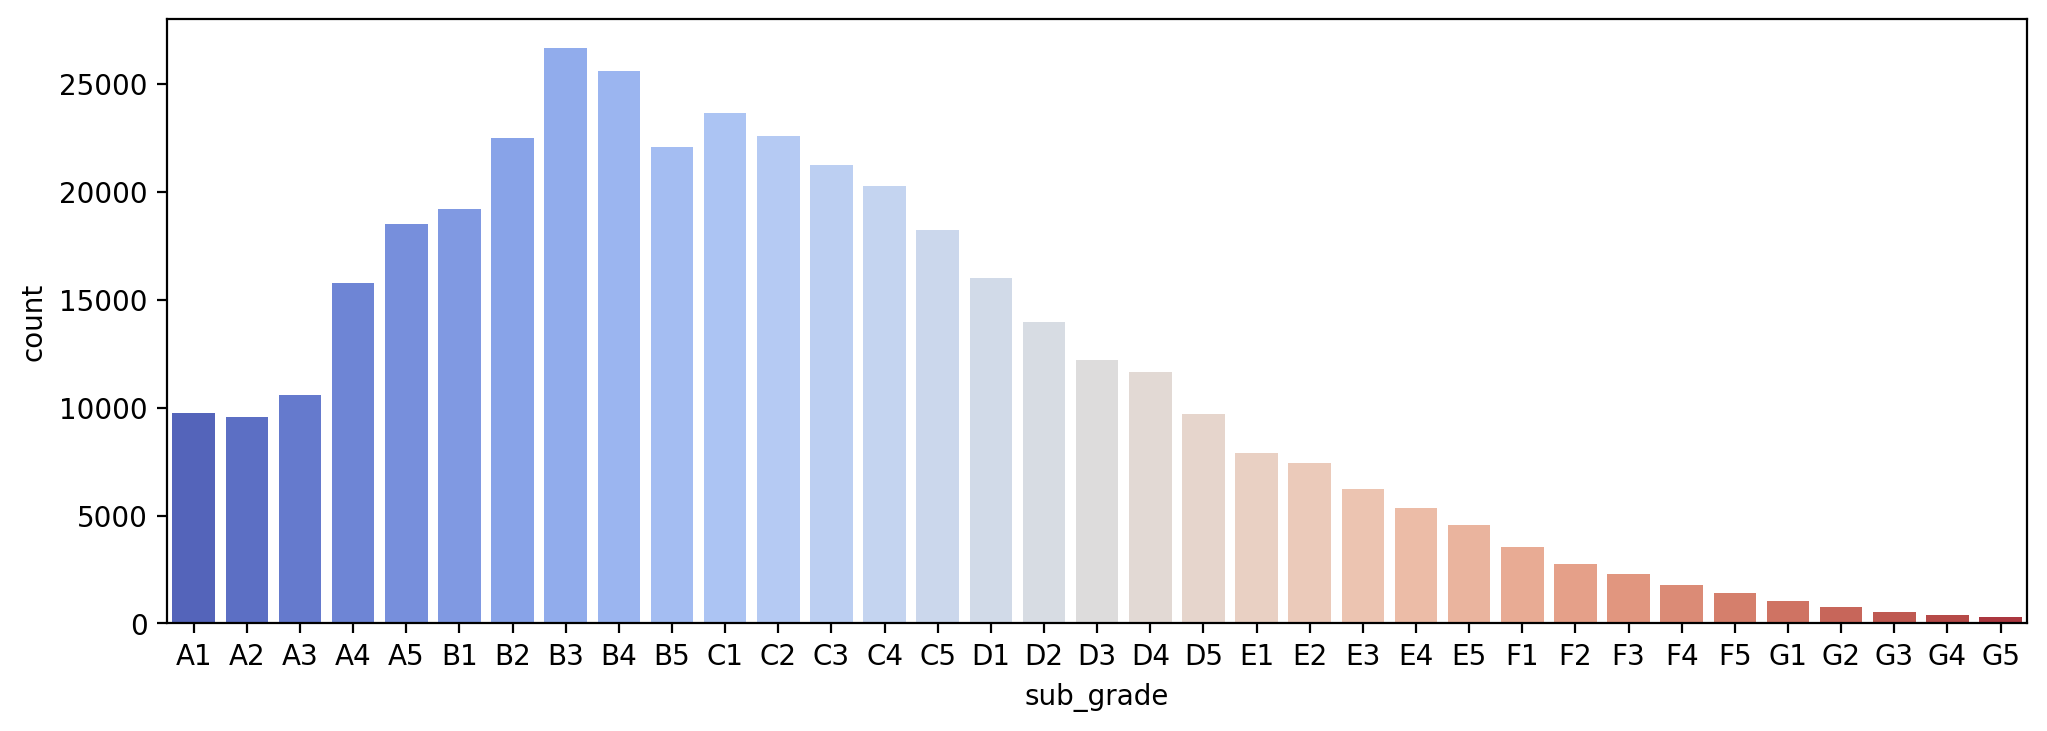

In [222]:
plt.figure(figsize=(12,4), dpi=200)
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(data=df, x='sub_grade', order=subgrade_order, palette='coolwarm');

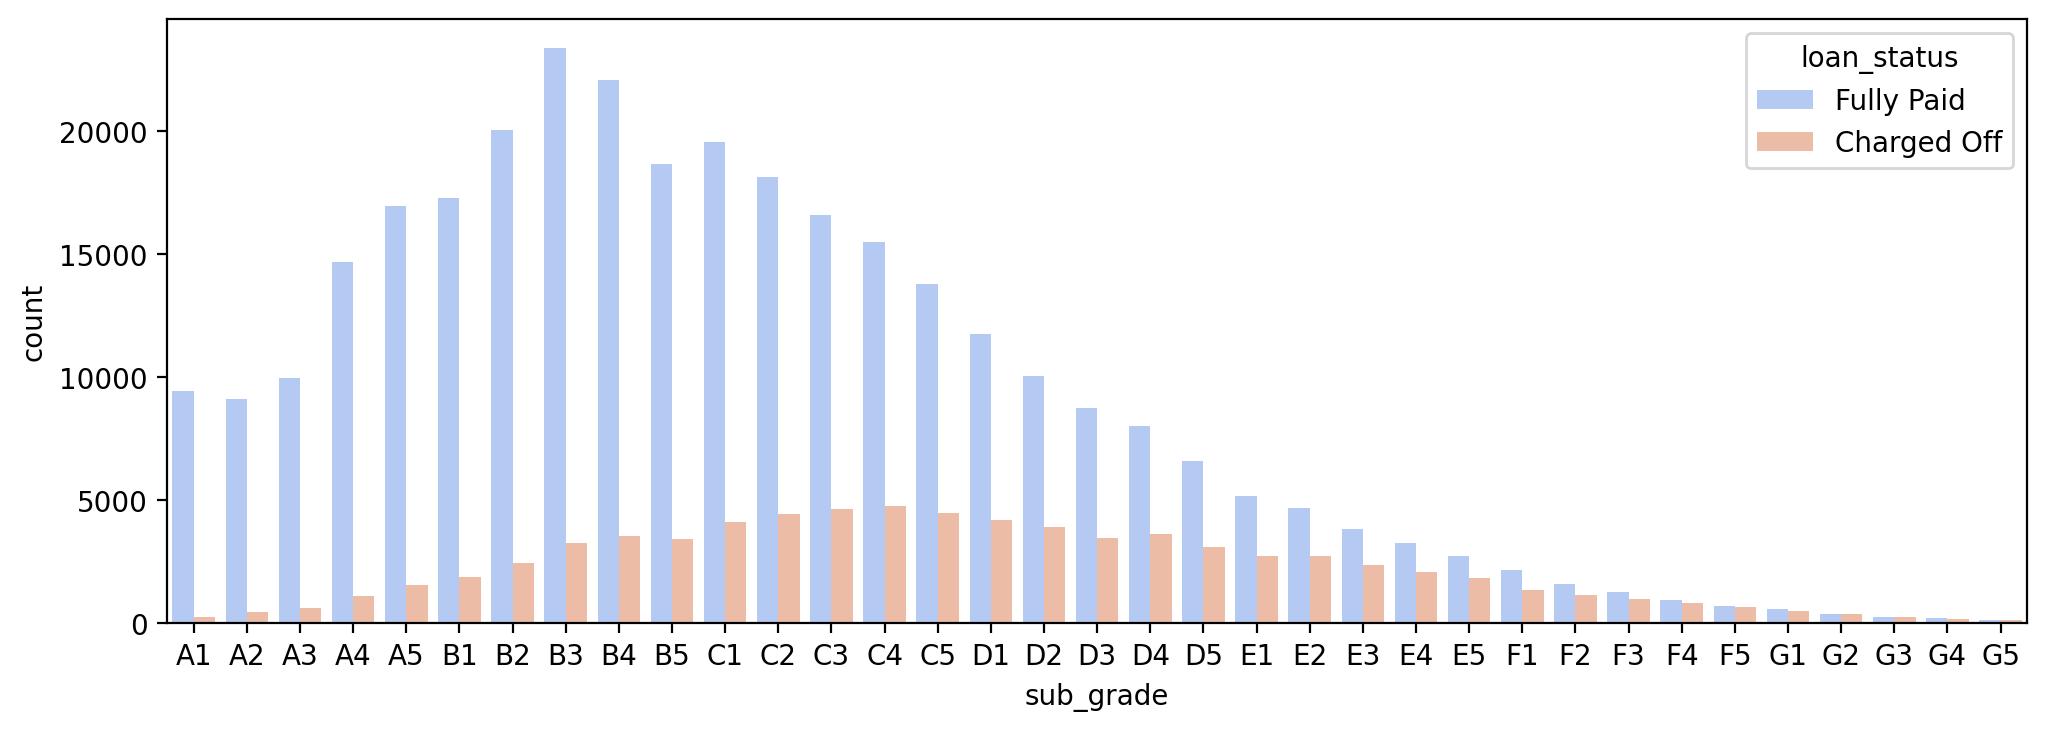

In [223]:
plt.figure(figsize=(12,4), dpi=200)
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(data=df, x='sub_grade', order=subgrade_order, palette='coolwarm', hue='loan_status');

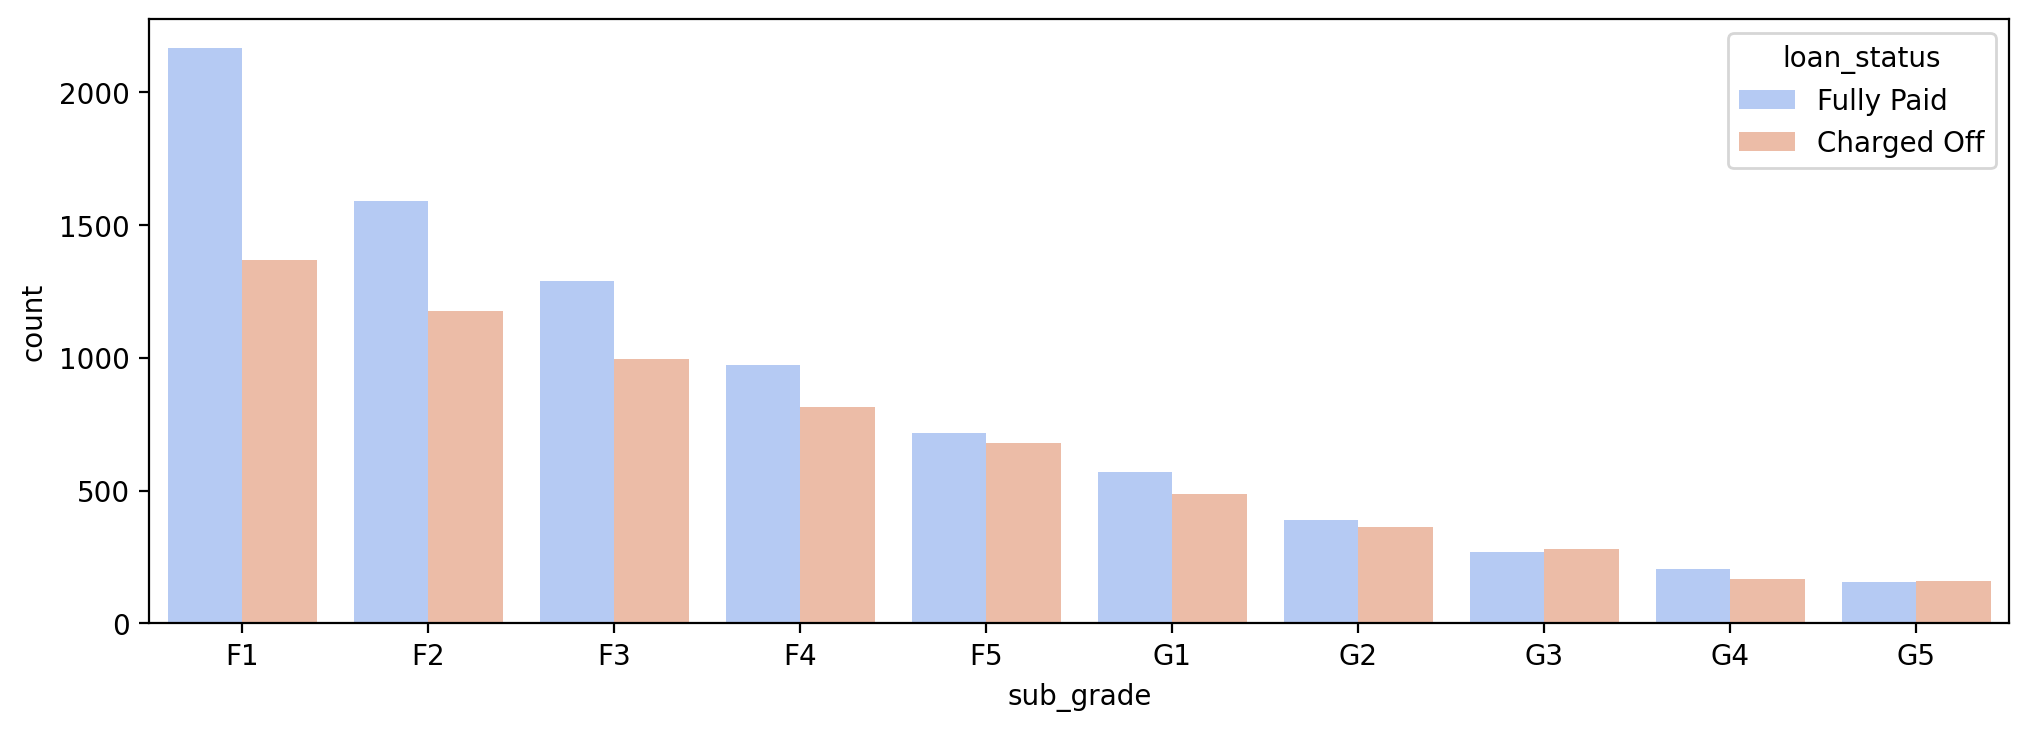

In [225]:
f_and_g = df[(df['grade'] == 'G') | (df['grade'] == 'F')]

plt.figure(figsize=(12,4), dpi=200)
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(data=f_and_g, x='sub_grade', order=subgrade_order, palette='coolwarm', hue='loan_status');

In [226]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

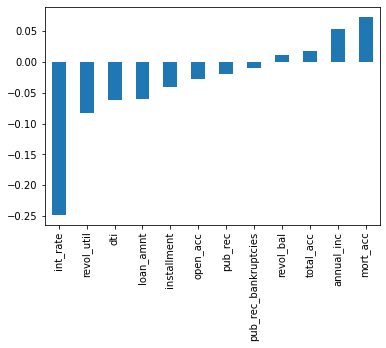

In [229]:
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar');

# DATA CLEANING - COURSE

In [322]:
df = pd.read_csv('./data/lending_club_loan_two.csv')

In [323]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [324]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [300]:
100 * df.isnull().sum() / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

**Employment Title**

In [234]:
df['emp_title'].nunique()

173105

In [233]:
df['emp_title'].value_counts()

Teacher                                     4389
Manager                                     4250
Registered Nurse                            1856
RN                                          1846
Supervisor                                  1830
                                            ... 
Providence Little Company of Mary Med. C       1
AFC ELECTRIC INC.                              1
Grade 12 auto Mechanic                         1
PROFESSIONAL DRIVER                            1
Minnesota Youth Athletic Services              1
Name: emp_title, Length: 173105, dtype: int64

In [325]:
df = df.drop('emp_title', axis=1)

**Employment Length**

In [237]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [238]:
length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

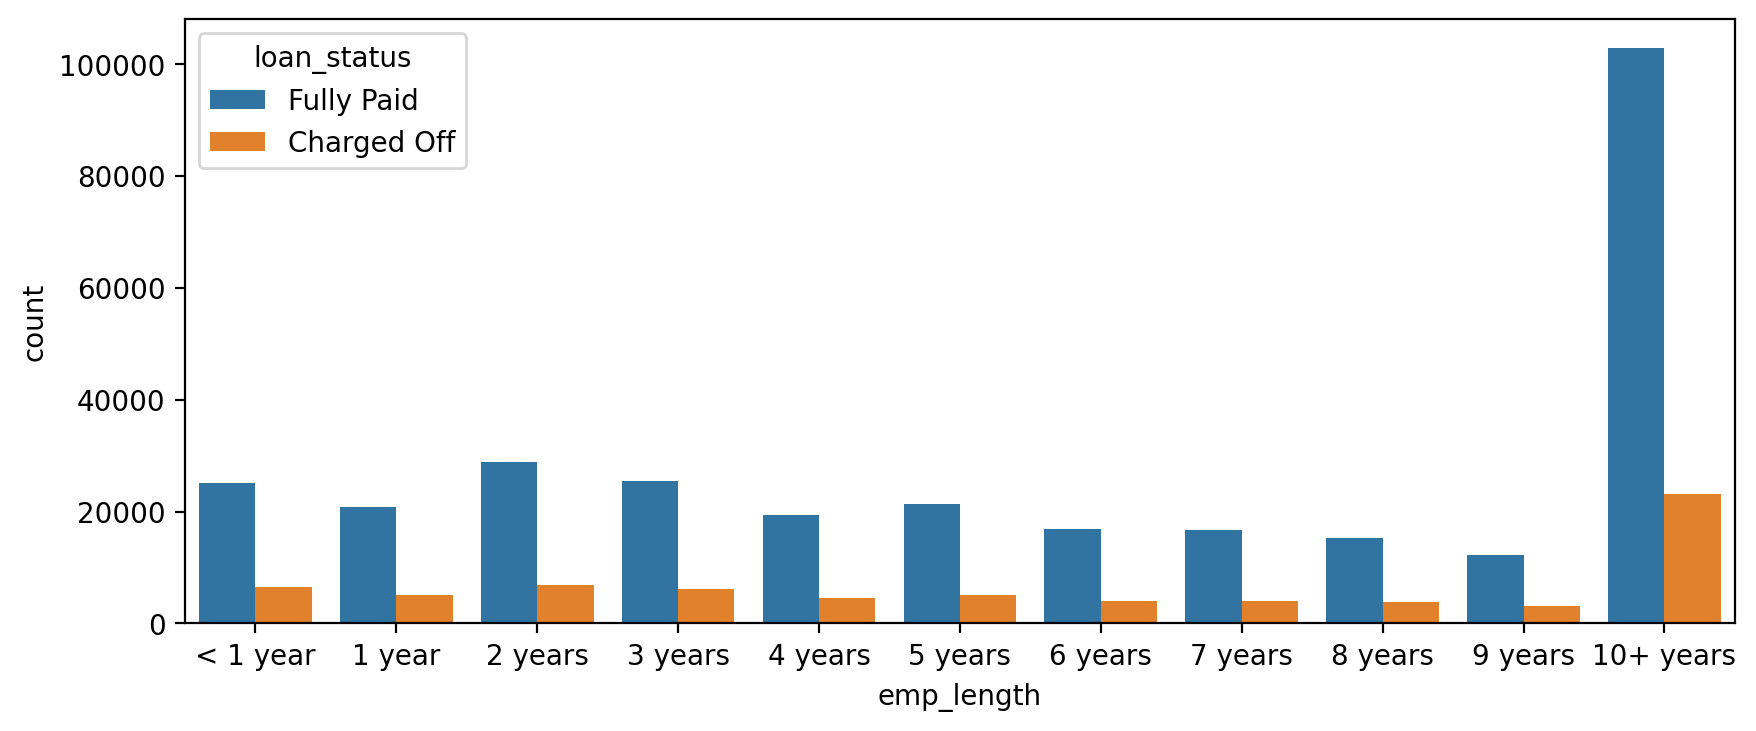

In [240]:
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(x='emp_length', data=df, order=length_order, hue='loan_status');

In [245]:
emp_charged_off = df[ df['loan_status'] == 'Charged Off' ].groupby('emp_length').count()['loan_status']

In [244]:
emp_fully_paid = df[ df['loan_status'] == 'Fully Paid' ].groupby('emp_length').count()['loan_status']

In [247]:
# as we can see, there is not much predictive power coming from the employment length
emp_charged_off / (emp_charged_off + emp_fully_paid)

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

In [326]:
df = df.drop('emp_length', axis=1)

In [327]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Loan Title vs Purpose**

In [252]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [253]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [254]:
df['title'].nunique()

48817

In [328]:
df = df.drop('title', axis=1)

**How to handle mort_acc feature?**

In [257]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [258]:
# correlation to mort_acc column
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [329]:
total_acc_mean = df.groupby('total_acc').mean()['mort_acc']

In [330]:
def fill_mort_acc(total_acc, mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_mean[total_acc]
    else:
        return mort_acc

In [331]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [332]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**Drop Missing Values**

In [333]:
df = df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [334]:
df_checkpoint1 = df.copy()

# Categorical Data

In [310]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [335]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [336]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [337]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [338]:
# recall that grade is already encoded in the subgrade columns
df = df.drop('grade', axis=1)

In [339]:
df_small = df.copy()

In [340]:
df_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [341]:
df = pd.concat([df.drop('sub_grade', axis=1), df_dummies], axis=1)

In [342]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [343]:
df_small = df_small.drop(['purpose', 'issue_d', 'address'], axis=1)

**Small DataFrame**

In [346]:
df_small.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid'],
      dtype='object')

In [345]:
df_small = df_small.drop(['loan_status'], axis=1)

In [347]:
df_dummies = pd.get_dummies(df_small['sub_grade'], drop_first=True)
df_small = pd.concat([df_small.drop('sub_grade', axis=1), df_dummies], axis=1)
df_small.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [348]:
df_dummies = pd.get_dummies(df_small[['verification_status', 'application_type', 'initial_list_status']], drop_first=True)

df_small = pd.concat([df_small.drop(['verification_status', 'application_type', 'initial_list_status'], axis=1), df_dummies], axis=1)

In [349]:
df_dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)

df = pd.concat([df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1), df_dummies], axis=1)

In [350]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [351]:
# let's put ANY and NONE housing into OTHER
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [352]:
df_small['home_ownership'] = df_small['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [353]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [354]:
df_dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

df = pd.concat([df.drop('home_ownership', axis=1), df_dummies], axis=1)

In [355]:
df_dummies = pd.get_dummies(df_small['home_ownership'], drop_first=True)

df_small = pd.concat([df_small.drop('home_ownership', axis=1), df_dummies], axis=1)

In [356]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 57 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   earliest_cr_line                     395219 non-null  object 
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

In [281]:
# extract the zip code from the address column
df['zip_code'] = df['address'].apply(lambda x: x[-5:])

In [282]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [283]:
df_dummies = pd.get_dummies(df['zip_code'], drop_first=True)

df = pd.concat([df.drop('zip_code', axis=1), df_dummies], axis=1)

In [284]:
df = df.drop('address', axis=1)

In [285]:
# data leakage: so we will drop the issue_d column
df = df.drop('issue_d', axis=1)

In [357]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [358]:
df_small['earliest_cr_line'] = df_small['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [290]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   loan_status                          395219 non-null  object 
 6   dti                                  395219 non-null  float64
 7   earliest_cr_line                     395219 non-null  int64  
 8   open_acc                             395219 non-null  float64
 9   pub_rec                              395219 non-null  float64
 10  revol_bal                            395219 non-null  float64
 11  revol_util   

In [359]:
df = df.drop('loan_status', axis=1)

In [360]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies',
       'address', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3',
       'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
       'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2',
       'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'],
 

In [362]:
df_small.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

In [364]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 57 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   earliest_cr_line                     395219 non-null  int64  
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

In [363]:
df_small.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,395219.0,14122.061250,8357.054944,500.00,8000.00,12000.00,20000.00,40000.00
term,395219.0,41.706527,10.217263,36.00,36.00,36.00,36.00,60.00
int_rate,395219.0,13.642094,4.472944,5.32,10.49,13.33,16.55,30.99
installment,395219.0,432.069020,250.700153,16.08,250.33,375.49,567.79,1533.81
annual_inc,395219.0,74199.372426,61557.251371,0.00,45000.00,64000.00,90000.00,8706582.00
dti,395219.0,17.390758,18.032696,0.00,11.30,16.92,22.99,9999.00
earliest_cr_line,395219.0,1997.861636,7.199028,1944.00,1994.00,1999.00,2003.00,2013.00
open_acc,395219.0,11.318494,5.134901,1.00,8.00,10.00,14.00,90.00
pub_rec,395219.0,0.178481,0.531098,0.00,0.00,0.00,0.00,86.00
revol_bal,395219.0,15851.653309,20584.268053,0.00,6038.00,11190.00,19626.00,1743266.00


In [366]:
df_small = df_small[ df_small['revol_util'] < 200 ]
df_small['revol_util'].nlargest(25)

329037    153.0
82600     152.5
65687     150.7
350333    148.0
165111    146.1
312268    145.8
296174    140.4
108246    136.7
211426    132.1
153970    129.5
16793     129.4
391865    128.1
51619     127.6
319308    127.6
75751     127.4
257697    124.7
335489    123.3
130785    123.2
266203    123.2
339095    123.2
134721    123.0
274983    122.7
250691    121.7
339839    121.0
160693    120.2
Name: revol_util, dtype: float64

In [368]:
df_income = df_small[ df_small['annual_inc'] < 500000 ]

In [371]:
df_income = df_income[ df_income['dti'] < 200 ]

In [373]:
df_clean = df_income[df_income['revol_bal'] < 1000000]

In [374]:
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,394726.0,14109.154071,8346.562387,500.00,8000.00,12000.00,20000.00,40000.00
term,394726.0,41.706784,10.217421,36.00,36.00,36.00,36.00,60.00
int_rate,394726.0,13.642953,4.472581,5.32,10.49,13.33,16.55,30.99
installment,394726.0,431.656873,250.299899,16.08,250.33,375.43,567.04,1533.81
annual_inc,394726.0,73206.727261,42948.107060,2500.00,45000.00,64000.00,90000.00,498000.00
dti,394726.0,17.374999,8.131067,0.00,11.32,16.93,23.00,189.90
earliest_cr_line,394726.0,1997.866986,7.196447,1944.00,1994.00,1999.00,2003.00,2013.00
open_acc,394726.0,11.316990,5.133673,1.00,8.00,10.00,14.00,90.00
pub_rec,394726.0,0.178501,0.531012,0.00,0.00,0.00,0.00,86.00
revol_bal,394726.0,15767.320192,19523.213375,0.00,6036.00,11185.00,19605.00,867528.00


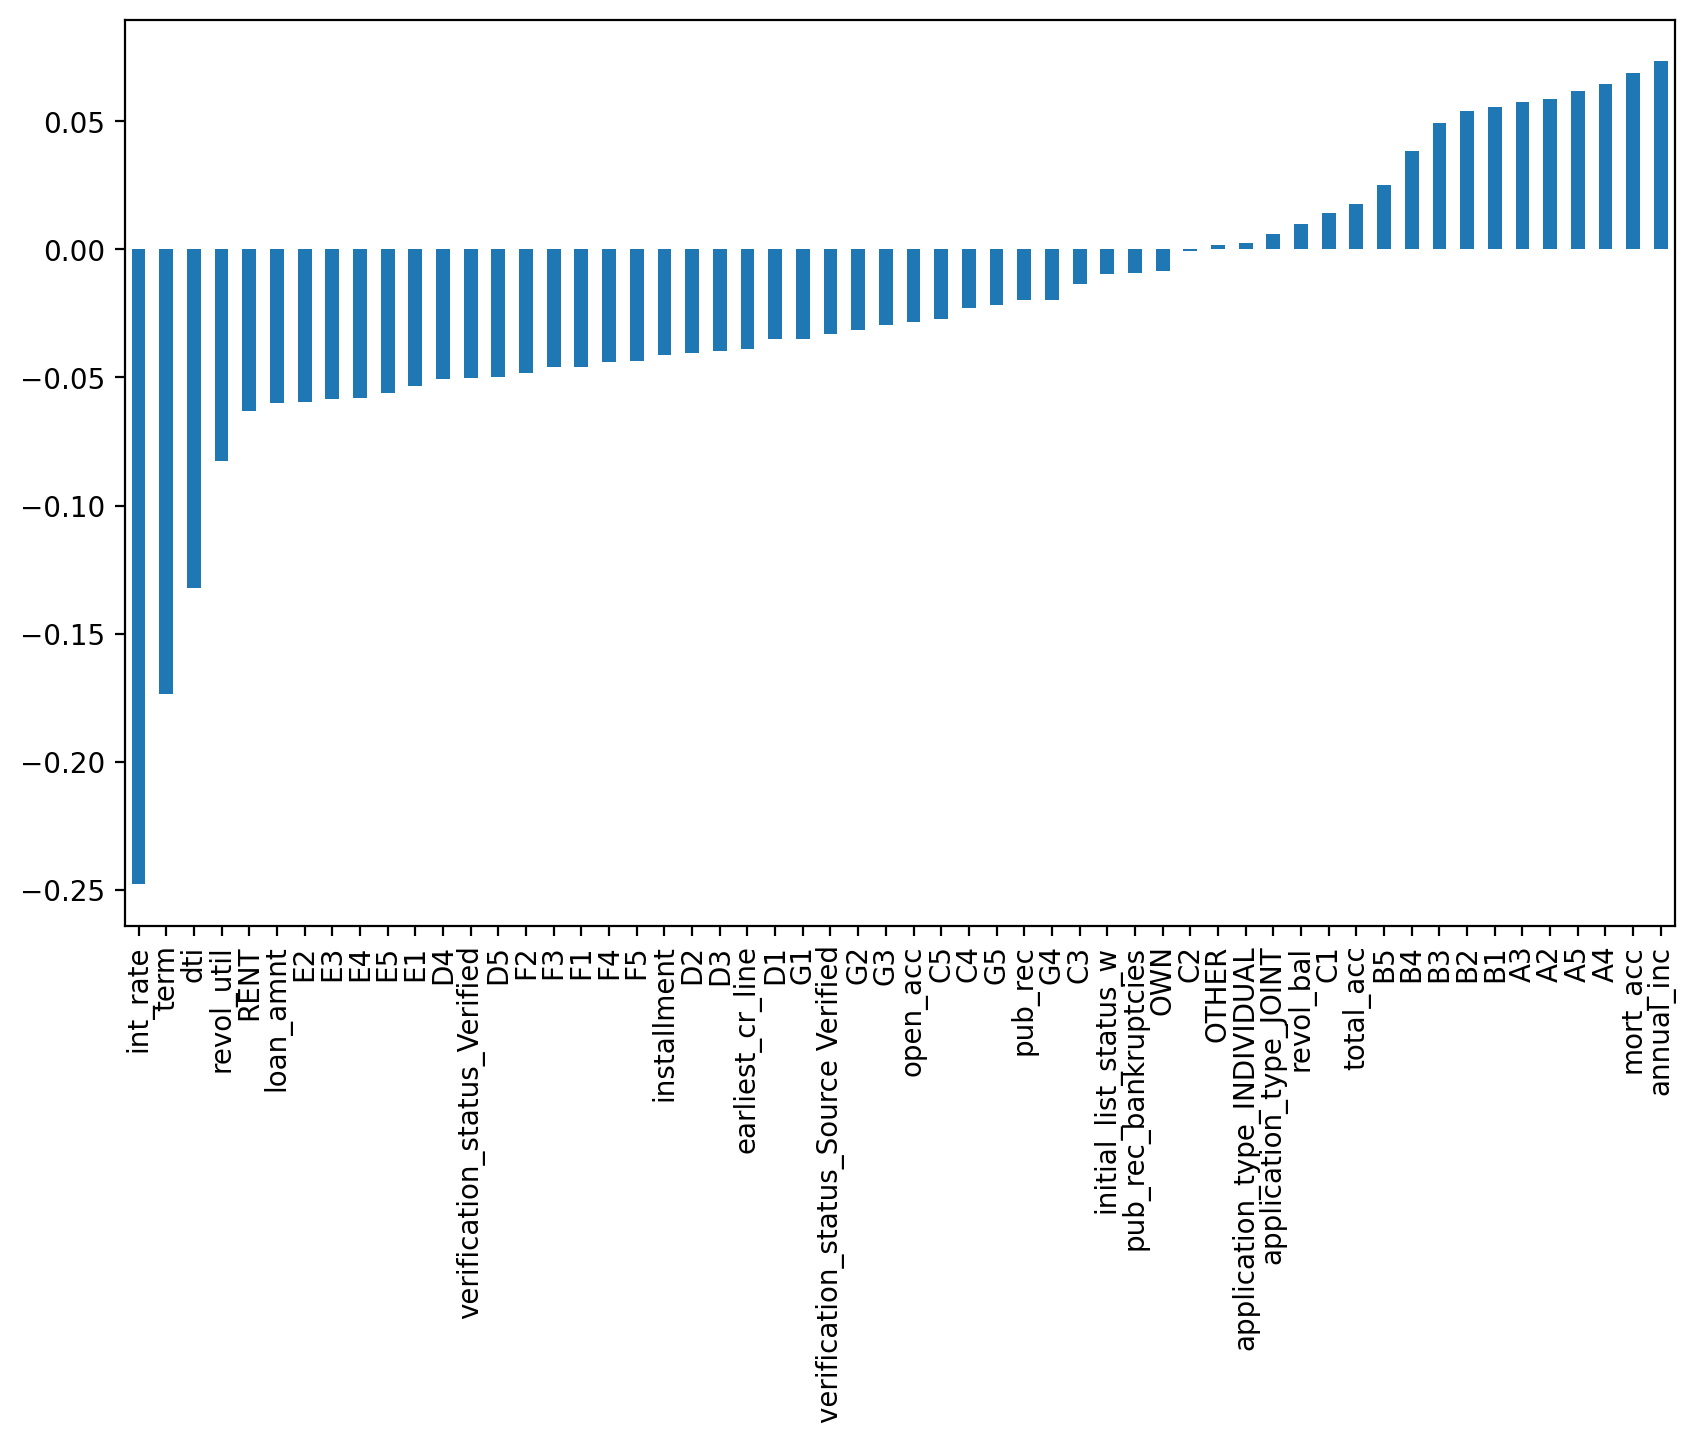

In [376]:
plt.figure(figsize=(10,6), dpi=200)
df_clean.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [378]:
df_clean.reset_index(inplace=True, drop=True)
df_clean.to_csv('./data/lending_data_small_removed_outliers.csv', index=False)
df_clean

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,26.24,1990,16.0,0.0,36369.0,...,0,0,0,0,1,0,1,0,0,1
1,8000.0,36,11.99,265.68,65000.0,22.05,2004,17.0,0.0,20131.0,...,0,0,0,0,1,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,12.79,2007,13.0,0.0,11987.0,...,0,0,1,0,1,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,2.60,2006,6.0,0.0,5472.0,...,0,0,0,0,1,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,33.95,1999,13.0,0.0,24584.0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394721,10000.0,60,10.99,217.38,40000.0,15.63,2004,6.0,0.0,1990.0,...,0,0,1,0,1,0,1,0,0,1
394722,21000.0,36,12.29,700.42,110000.0,21.45,2006,6.0,0.0,43263.0,...,0,0,1,0,1,0,0,0,0,0
394723,5000.0,36,9.99,161.32,56500.0,17.56,1997,15.0,0.0,32704.0,...,0,0,0,1,1,0,0,0,0,1
394724,21000.0,60,15.31,503.02,64000.0,15.88,1990,9.0,0.0,15704.0,...,0,0,0,1,1,0,0,0,0,0


In [296]:
df.reset_index(inplace=True, drop=True)
df

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,26.24,1990,16.0,0.0,36369.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,22.05,2004,17.0,0.0,20131.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,12.79,2007,13.0,0.0,11987.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,2.60,2006,6.0,0.0,5472.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,33.95,1999,13.0,0.0,24584.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395214,10000.0,60,10.99,217.38,40000.0,15.63,2004,6.0,0.0,1990.0,...,1,0,0,0,0,1,0,0,0,0
395215,21000.0,36,12.29,700.42,110000.0,21.45,2006,6.0,0.0,43263.0,...,0,1,0,0,0,0,0,0,0,0
395216,5000.0,36,9.99,161.32,56500.0,17.56,1997,15.0,0.0,32704.0,...,1,0,0,0,0,0,0,1,0,0
395217,21000.0,60,15.31,503.02,64000.0,15.88,1990,9.0,0.0,15704.0,...,0,0,0,0,1,0,0,0,0,0


In [297]:
df.to_csv('./data/lending_club_course.csv', index=False)

# MY DATA CLEANING STEPS FOLLOW

**Potential Data Cleaning Steps:**

- drop the address column (and/or extract the state to keep at least some geographical info)
- "revol_util": remove index 137211 because the revolving credit utilization is at 892% (only lose 1 row)
- remove the extremely high income outliers: e.g., eliminate 254 (0.06%) people whose reported income is over \$600,000.
- convert the "earliest_cr_line" feature to a length of time instead, e.g. 24 months (using the present month: June, 2021); then drop this column
- convert the "home_ownership" that is ambiguous (ANY and NONE) to the more general OTHER category


**Handle Missing Values:**

- "revol_util": replace 276 values with the average utilization (after dropping the one outlier, see above)
- "mort_acc": can we drop this feature altogether?
- "pub_rec_bankruptcies": fill missing values with zeros
- "title": we can drop this column since there are too many unique categories
- "emp_length": if nan, put either "unemployed" or "unknown" (unknown if they put a job title)
- "emp_title": convert this nan data to "employed" or "unemployed"

In [27]:
len(df_less_income)

395776

In [28]:
# CLEANING #2: DROP USER-PROVIDED LOAN TITLE (FULL COLUMN)
df_less_income = df_less_income.drop(['title'], axis=1)

In [29]:
df_less_income['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395776, dtype: object

In [30]:
temp = "0174 Michelle Gateway\r\nMendozaberg, OK 22690"

state = temp.split(', ')[-1][:2]

state

'OK'

In [31]:
def get_state(x):
    client_state = x.split(', ')[-1][:2]
    return client_state

In [32]:
df_less_income['address'].apply(get_state).value_counts()

Un    14280
Bo    14049
US    14031
NJ     7082
WI     7079
LA     7064
NV     7033
AK     7028
VA     7019
MA     7018
MS     7001
VT     7000
TX     7000
NY     7000
SC     6969
AR     6968
OH     6964
GA     6964
ME     6964
IN     6955
ID     6954
WV     6942
KS     6939
RI     6935
IL     6930
WY     6930
MO     6928
HI     6924
IA     6923
NE     6921
FL     6919
AZ     6915
CO     6909
OK     6904
MN     6902
CT     6899
NC     6895
AL     6894
OR     6894
CA     6894
MD     6892
WA     6887
UT     6885
SD     6881
MT     6876
DE     6869
TN     6863
ND     6853
MI     6850
DC     6839
NM     6837
PA     6818
NH     6812
KY     6795
Name: address, dtype: int64

In [33]:
# CLEANING #3: DROP ADDRESS COLUMN
df_less_income = df_less_income.drop('address', axis=1)

In [34]:
df_checkpoint = df_less_income.copy()

In [35]:
def simplify_housing(x):
    if (x == 'ANY' or x == 'NONE'):
        y = 'OTHER'
    else:
        y = x
    return y

In [36]:
df_less_income['home_ownership'].iloc[0]

'RENT'

In [37]:
df_less_income['home_ownership'].apply(simplify_housing).value_counts()

MORTGAGE    198184
RENT        159738
OWN          37708
OTHER          146
Name: home_ownership, dtype: int64

In [38]:
# CLEANING #4: SIMPLIFY THE HOUSING CATEGORIES
df_less_income['home_ownership'] = df_less_income['home_ownership'].apply(simplify_housing)

In [39]:
df_less_income['home_ownership'].value_counts()

MORTGAGE    198184
RENT        159738
OWN          37708
OTHER          146
Name: home_ownership, dtype: int64

In [40]:
df_less_income.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22912
emp_length              18297
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                275
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37756
pub_rec_bankruptcies      534
dtype: int64

In [41]:
df_less_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395776 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395776 non-null  float64
 1   term                  395776 non-null  object 
 2   int_rate              395776 non-null  float64
 3   installment           395776 non-null  float64
 4   grade                 395776 non-null  object 
 5   sub_grade             395776 non-null  object 
 6   emp_title             372864 non-null  object 
 7   emp_length            377479 non-null  object 
 8   home_ownership        395776 non-null  object 
 9   annual_inc            395776 non-null  float64
 10  verification_status   395776 non-null  object 
 11  issue_d               395776 non-null  object 
 12  loan_status           395776 non-null  object 
 13  purpose               395776 non-null  object 
 14  dti                   395776 non-null  float64
 15  

In [42]:
# CLEANING #5: ASSUME THAT nan FOR BANKRUPTCY MEANS THE CLIENT HAS 0
df_less_income['pub_rec_bankruptcies'].fillna(0.0, inplace=True)

In [43]:
df_less_income['pub_rec_bankruptcies'].value_counts()

0.0    350670
1.0     42782
2.0      1846
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [44]:
df_less_income.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22912
emp_length              18297
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                275
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37756
pub_rec_bankruptcies        0
dtype: int64

In [45]:
df_less_income['revol_util'].nlargest(20)

137211    892.3
329037    153.0
82600     152.5
65687     150.7
350333    148.0
165111    146.1
312268    145.8
296174    140.4
108246    136.7
211426    132.1
153970    129.5
16793     129.4
391865    128.1
51619     127.6
319308    127.6
75751     127.4
257697    124.7
335489    123.3
130785    123.2
266203    123.2
Name: revol_util, dtype: float64

In [46]:
df_less_income.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,395776.0,14107.880973,8352.515475,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,395776.0,13.639982,4.472058,5.32,10.49,13.33,16.49,30.99
installment,395776.0,431.659752,250.542600,16.08,250.33,375.43,567.17,1533.81
annual_inc,395776.0,73483.018564,44457.077568,0.00,45000.00,64000.00,90000.00,600000.00
dti,395776.0,17.387952,18.021475,0.00,11.30,16.91,22.99,9999.00
open_acc,395776.0,11.310312,5.137023,0.00,8.00,10.00,14.00,90.00
pub_rec,395776.0,0.178169,0.530534,0.00,0.00,0.00,0.00,86.00
revol_bal,395776.0,15800.835723,20079.244738,0.00,6024.00,11179.00,19609.00,1743266.00
revol_util,395501.0,53.795495,24.448584,0.00,35.80,54.80,72.90,892.30
total_acc,395776.0,25.411399,11.884801,2.00,17.00,24.00,32.00,151.00


In [47]:
df_less_income.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22912
emp_length              18297
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                275
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37756
pub_rec_bankruptcies        0
dtype: int64

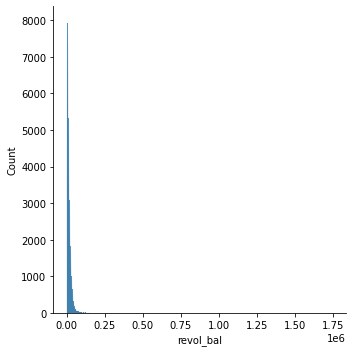

In [48]:
sns.displot(data=df_less_income, x='revol_bal');

In [49]:
df_less_income['revol_bal'].nlargest(50)

118582    1743266.0
53563     1190046.0
255310    1023940.0
238979     867528.0
134154     814300.0
181198     744190.0
241384     693471.0
103864     690987.0
385370     669560.0
379095     669257.0
141152     664894.0
318342     661711.0
151343     658548.0
367755     654134.0
163841     643871.0
343828     626102.0
79165      624356.0
30354      617838.0
180789     607891.0
37028      605627.0
12926      605063.0
373037     576771.0
288796     570842.0
395372     568659.0
129342     563624.0
136045     561634.0
202156     555673.0
210612     555597.0
184206     552758.0
108914     548344.0
120844     544606.0
378133     527694.0
330610     527075.0
114065     519324.0
43915      510070.0
160624     506030.0
188680     502093.0
290772     497895.0
283825     492732.0
279120     491712.0
236460     488421.0
308490     485261.0
279656     482629.0
285234     479916.0
55424      478307.0
387763     476869.0
183064     476755.0
210259     474130.0
269782     464531.0
39578      462076.0


In [50]:
q99 = df_less_income['revol_bal'].quantile(0.995)
q99

119763.0

In [51]:
df_less_income['total_acc'].nlargest(40)

105682    151.0
123703    150.0
53317     135.0
82628     129.0
96571     124.0
116541    118.0
154720    117.0
322243    116.0
337833    116.0
140803    115.0
41264     111.0
175632    111.0
84480     110.0
14690     108.0
107918    107.0
133923    107.0
221172    107.0
250210    107.0
23546     106.0
177298    106.0
10952     105.0
112979    105.0
140335    105.0
6755      104.0
359804    103.0
77017     102.0
138397    102.0
268035    102.0
317824    102.0
51797     101.0
394185    101.0
223233    100.0
72094      99.0
122589     99.0
127544     99.0
165834     99.0
364410     99.0
209490     98.0
273075     98.0
11244      97.0
Name: total_acc, dtype: float64

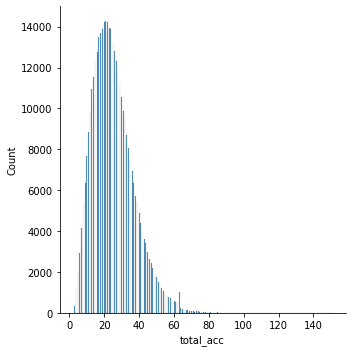

In [52]:
sns.displot(data=df_less_income, x='total_acc');

In [53]:
# CLEANING #6: FILL nan VALUES FOR REVOLVING UTIL 
mean_util = df_less_income['revol_util'].sort_values(ascending=False)[1:].mean()
df_less_income['revol_util'].fillna(mean_util, inplace=True)

In [54]:
# CLEANING #7: REMOVE THE HIGH REVOLVING UTIL CLIENT
df_temp = df_less_income[ df_less_income['revol_util'] < 200 ]

In [55]:
df_temp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,395775.0,14107.907776,8352.509007,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,395775.0,13.639985,4.472063,5.32,10.49,13.33,16.49,30.99
installment,395775.0,431.660546,250.542418,16.08,250.33,375.43,567.17,1533.81
annual_inc,395775.0,73483.090532,44457.110678,0.00,45000.00,64000.00,90000.00,600000.00
dti,395775.0,17.387959,18.021497,0.00,11.30,16.91,22.99,9999.00
open_acc,395775.0,11.310335,5.137008,0.00,8.00,10.00,14.00,90.00
pub_rec,395775.0,0.178169,0.530535,0.00,0.00,0.00,0.00,86.00
revol_bal,395775.0,15800.868883,20079.259268,0.00,6024.00,11179.00,19609.00,1743266.00
revol_util,395775.0,53.793375,24.403749,0.00,35.90,54.80,72.90,153.00
total_acc,395775.0,25.411441,11.884787,2.00,17.00,24.00,32.00,151.00


In [56]:
df_temp['dti'].nlargest(50)

285674    9999.00
350865    1622.00
338571     380.53
7011       189.90
36015      145.65
296164     138.03
294182     120.66
264045     107.55
280972      93.86
317615      92.13
34083       88.21
108842      77.95
326512      71.40
387612      68.56
193404      68.30
322920      63.98
333754      63.10
314513      62.80
70873       62.70
23346       59.26
361343      59.26
153278      59.18
6273        58.90
177109      57.14
395810      55.53
264739      55.42
230165      54.96
323601      54.90
331001      52.80
272876      52.69
139043      52.20
328072      52.02
391401      51.73
4413        51.20
144341      50.10
189013      49.83
100414      49.56
340817      49.55
9752        49.42
30139       49.38
394511      49.38
203639      49.25
214983      49.21
81534       49.16
265562      49.15
368821      49.14
240059      48.78
256296      48.77
60477       48.68
6957        48.56
Name: dti, dtype: float64

In [57]:
df_temp = df_temp[ df_temp['dti'] < 200 ]
len(df_temp)

395772

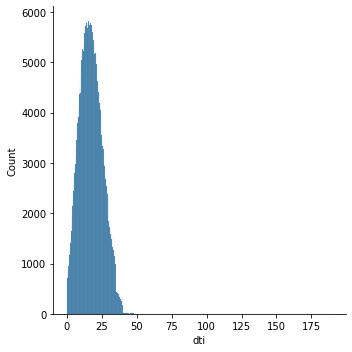

In [58]:
sns.displot(data=df_temp, x='dti');

In [59]:
df_temp.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22910
emp_length              18295
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37756
pub_rec_bankruptcies        0
dtype: int64

In [60]:
df_temp['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [61]:
df_temp['mort_acc'].mean()

1.8129776322845905

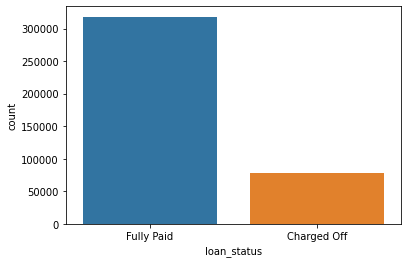

In [62]:
sns.countplot(data=df_temp, x='loan_status');

In [63]:
# CLEANING #8: CHANGE nan EMPLOYMENT LENGTH TO UNKNOWN (FOR NOW) 
df_temp['emp_length'].fillna('unknown', inplace=True)

In [64]:
df_temp['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       'unknown'], dtype=object)

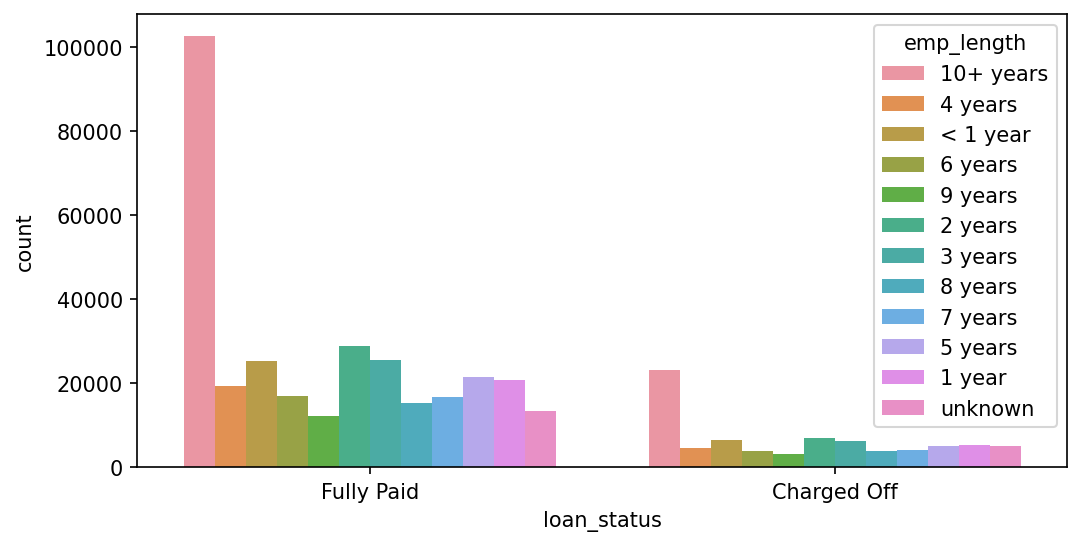

In [65]:
plt.figure(figsize=(8,4), dpi=150)
sns.countplot(data=df_temp, x='loan_status', hue='emp_length');

In [66]:
# CLEANING #9: CHANGE nan EMPLOYMENT TITLE TO UNKNOWN (FOR NOW) 
df_temp['emp_title'].fillna('unknown', inplace=True)

In [67]:
df_temp.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37756
pub_rec_bankruptcies        0
dtype: int64

In [68]:
df_temp['emp_title'].value_counts()

unknown                              22910
Teacher                               4389
Manager                               4246
Registered Nurse                      1855
RN                                    1846
                                     ...  
IPS Industries Inc                       1
Commander  (Supervisor )                 1
mcconnell orthodontics                   1
Vision Source                            1
Minnesota Youth Athletic Services        1
Name: emp_title, Length: 173033, dtype: int64

In [69]:
len(df_temp)

395772

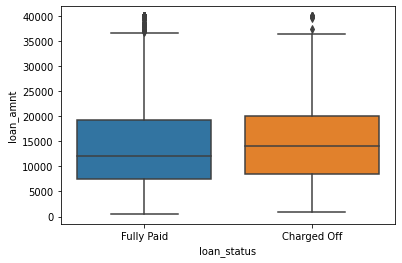

In [70]:
sns.boxplot(data=df_temp, x='loan_status', y='loan_amnt');

In [217]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [71]:
# CLEANING #10: DROP THE emp_title COLUMN COMPLETELY
df_temp.drop('emp_title', axis=1, inplace=True)

In [72]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395772 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395772 non-null  float64
 1   term                  395772 non-null  object 
 2   int_rate              395772 non-null  float64
 3   installment           395772 non-null  float64
 4   grade                 395772 non-null  object 
 5   sub_grade             395772 non-null  object 
 6   emp_length            395772 non-null  object 
 7   home_ownership        395772 non-null  object 
 8   annual_inc            395772 non-null  float64
 9   verification_status   395772 non-null  object 
 10  issue_d               395772 non-null  object 
 11  loan_status           395772 non-null  object 
 12  purpose               395772 non-null  object 
 13  dti                   395772 non-null  float64
 14  earliest_cr_line      395772 non-null  object 
 15  

In [215]:
plt.figure(figsize=(5,5), dpi=200)
sns.heatmap(df_temp.corr(), annot=True, cmap='viridis');

Error in callback <function flush_figures at 0x000001F9BF24B700> (for post_execute):


KeyboardInterrupt: 

**How will we handle the mort_acc feature?**

In [74]:
df_temp['mort_acc'].value_counts()

0.0     139745
1.0      60391
2.0      49912
3.0      38016
4.0      27854
5.0      18176
6.0      11056
7.0       6045
8.0       3113
9.0       1650
10.0       864
11.0       476
12.0       262
13.0       146
14.0       106
15.0        61
16.0        36
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [75]:
# CLEANING #10: DROP THE mort_acc COLUMN FOR THIS FIRST VERSION OF PREPROCESSING
df_clean = df_temp.drop('mort_acc', axis=1)

In [76]:
df_clean.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
pub_rec_bankruptcies    0
dtype: int64

In [77]:
len(df_clean)

395772

In [78]:
len(df)

396030

In [79]:
# percent data kept after cleaning
p = 100 * len(df_clean) / len(df)
print('Percent of Data Kept:', round(p,2), '%')
print('Number of Entried Lost:', len(df) - len(df_clean) )

Percent of Data Kept: 99.93 %
Number of Entried Lost: 258


In [80]:
df_clean.reset_index(inplace=True, drop=True)

In [81]:
df_clean

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,0.0
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395767,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0
395768,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,0.0
395769,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0
395770,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,...,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,0.0


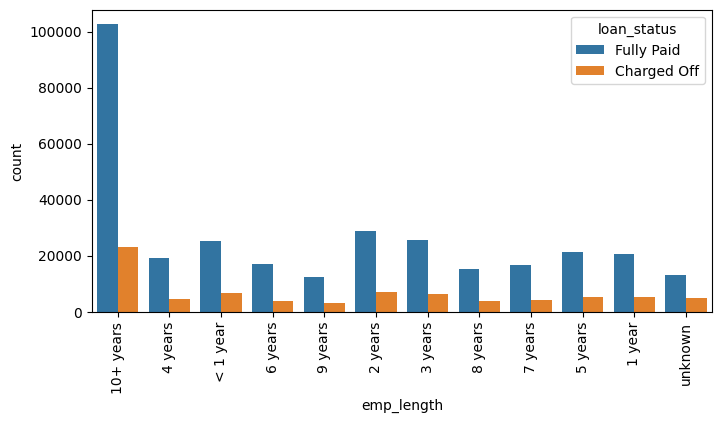

In [82]:
plt.figure(figsize=(8,4), dpi=100)
sns.countplot(data=df_clean, x='emp_length', hue='loan_status')
plt.xticks(rotation=90);

In [83]:
# SPILT DATA INTO NUMERICAL AND CATEGORICAL DATA
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395772 entries, 0 to 395771
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395772 non-null  float64
 1   term                  395772 non-null  object 
 2   int_rate              395772 non-null  float64
 3   installment           395772 non-null  float64
 4   grade                 395772 non-null  object 
 5   sub_grade             395772 non-null  object 
 6   emp_length            395772 non-null  object 
 7   home_ownership        395772 non-null  object 
 8   annual_inc            395772 non-null  float64
 9   verification_status   395772 non-null  object 
 10  issue_d               395772 non-null  object 
 11  loan_status           395772 non-null  object 
 12  purpose               395772 non-null  object 
 13  dti                   395772 non-null  float64
 14  earliest_cr_line      395772 non-null  object 
 15  

**Split the loan issue date into month and year columns.**

In [84]:
df_clean['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
395767    Oct-2015
395768    Feb-2015
395769    Oct-2013
395770    Aug-2012
395771    Jun-2010
Name: issue_d, Length: 395772, dtype: object

In [85]:
x = 'Jan-2015'

def split_dates(x):
    y = x.split('-')
    return y

split_dates(x)

['Jan', '2015']

In [86]:
df_clean['issue_d'].apply(split_dates)

0         [Jan, 2015]
1         [Jan, 2015]
2         [Jan, 2015]
3         [Nov, 2014]
4         [Apr, 2013]
             ...     
395767    [Oct, 2015]
395768    [Feb, 2015]
395769    [Oct, 2013]
395770    [Aug, 2012]
395771    [Jun, 2010]
Name: issue_d, Length: 395772, dtype: object

In [87]:
def get_year(x):
    y = x.split('-')
    return y[-1]

In [88]:
# df_clean['issue_year'] = df_clean['issue_d'].apply(get_year).astype(int)

In [89]:
def get_month(x):
    y = x.split('-')
    return y[0]

In [90]:
# df_clean['issue_month'] = df_clean['issue_d'].apply(get_month)

In [91]:
# df_clean.drop('issue_month', axis=1, inplace=True)

In [92]:
# df_clean.drop('year', axis=1, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395772 entries, 0 to 395771
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395772 non-null  float64
 1   term                  395772 non-null  object 
 2   int_rate              395772 non-null  float64
 3   installment           395772 non-null  float64
 4   grade                 395772 non-null  object 
 5   sub_grade             395772 non-null  object 
 6   emp_length            395772 non-null  object 
 7   home_ownership        395772 non-null  object 
 8   annual_inc            395772 non-null  float64
 9   verification_status   395772 non-null  object 
 10  issue_d               395772 non-null  object 
 11  loan_status           395772 non-null  object 
 12  purpose               395772 non-null  object 
 13  dti                   395772 non-null  float64
 14  earliest_cr_line      395772 non-null  object 
 15  

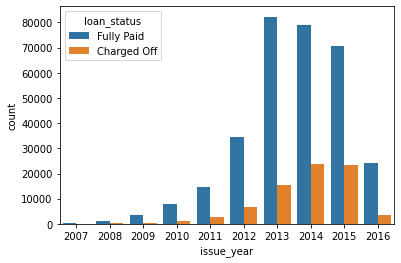

In [93]:
sns.countplot(data=df_clean, x='issue_year', hue='loan_status');

In [95]:
df_clean['result'] = df_clean['loan_status'].map({'Fully Paid': 1,
                       'Charged Off': 0})

In [96]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395772 entries, 0 to 395771
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395772 non-null  float64
 1   term                  395772 non-null  object 
 2   int_rate              395772 non-null  float64
 3   installment           395772 non-null  float64
 4   grade                 395772 non-null  object 
 5   sub_grade             395772 non-null  object 
 6   emp_length            395772 non-null  object 
 7   home_ownership        395772 non-null  object 
 8   annual_inc            395772 non-null  float64
 9   verification_status   395772 non-null  object 
 10  issue_d               395772 non-null  object 
 11  loan_status           395772 non-null  object 
 12  purpose               395772 non-null  object 
 13  dti                   395772 non-null  float64
 14  earliest_cr_line      395772 non-null  object 
 15  

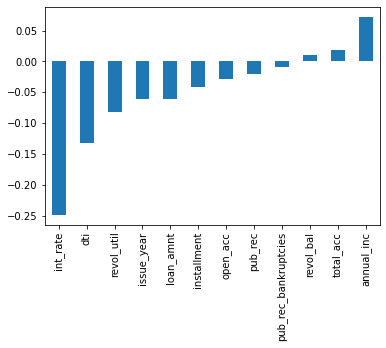

In [104]:
df_clean.corr()['result'].sort_values()[:-1].plot(kind='bar');

In [106]:
df_clean.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type'],
      dtype='object')

In [108]:
df_clean.select_dtypes(exclude=['object']).columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'issue_year', 'result'],
      dtype='object')

In [109]:
df_checkpoint = df_clean.copy()

In [ ]:
# DROP COLUMNS THAT WE HAVE ALREADY REPLACED VIA FEATURE ENGINEERING
# df_clean.drop(['issue_d', ], axis=1, inplace=True)

In [118]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395772 entries, 0 to 395771
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             395772 non-null  float64       
 1   term                  395772 non-null  object        
 2   int_rate              395772 non-null  float64       
 3   installment           395772 non-null  float64       
 4   grade                 395772 non-null  object        
 5   sub_grade             395772 non-null  object        
 6   emp_length            395772 non-null  object        
 7   home_ownership        395772 non-null  object        
 8   annual_inc            395772 non-null  float64       
 9   verification_status   395772 non-null  object        
 10  issue_d               395772 non-null  object        
 11  loan_status           395772 non-null  object        
 12  purpose               395772 non-null  object        
 13 

In [113]:
df_clean['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
395767    Oct-2015
395768    Feb-2015
395769    Oct-2013
395770    Aug-2012
395771    Jun-2010
Name: issue_d, Length: 395772, dtype: object

In [117]:
df_clean['oldest_acct'] = pd.to_datetime(df_clean['earliest_cr_line'])
df_clean['issue_date'] = pd.to_datetime(df_clean['issue_d'])

In [119]:
df_clean.drop('issue_year', axis=1, inplace=True)

In [130]:
# def compute_duration(x):
report_date = 'Jan-2017'
sample_date = 'Jan-1944'

b = pd.to_datetime(report_date)    
a = pd.to_datetime(sample_date)

print(b - a)

26664 days 00:00:00


In [131]:
x = b - a
type(x)

pandas._libs.tslibs.timedeltas.Timedelta

In [133]:
x.days

26664

In [129]:
df_clean['oldest_acct'].sort_values()

57800    1944-01-01
351561   1948-01-01
208349   1950-10-01
102130   1950-11-01
174195   1950-12-01
            ...    
37748    2013-09-01
199095   2013-09-01
293329   2013-09-01
358175   2013-10-01
215512   2013-10-01
Name: oldest_acct, Length: 395772, dtype: datetime64[ns]

In [134]:
def get_days_since(x):
    report_date = 'Jan-2017'
    y = pd.to_datetime(report_date)
    z = y - x
    return z.days

In [137]:
x = pd.to_datetime('Jan-2016')
get_days_since(x)

366

In [139]:
df_clean['oldest_acct_days'] = df_clean['oldest_acct'].apply(get_days_since)

In [140]:
df_clean['issue_date_days'] = df_clean['issue_date'].apply(get_days_since)

In [141]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395772 entries, 0 to 395771
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             395772 non-null  float64       
 1   term                  395772 non-null  object        
 2   int_rate              395772 non-null  float64       
 3   installment           395772 non-null  float64       
 4   grade                 395772 non-null  object        
 5   sub_grade             395772 non-null  object        
 6   emp_length            395772 non-null  object        
 7   home_ownership        395772 non-null  object        
 8   annual_inc            395772 non-null  float64       
 9   verification_status   395772 non-null  object        
 10  issue_d               395772 non-null  object        
 11  loan_status           395772 non-null  object        
 12  purpose               395772 non-null  object        
 13 

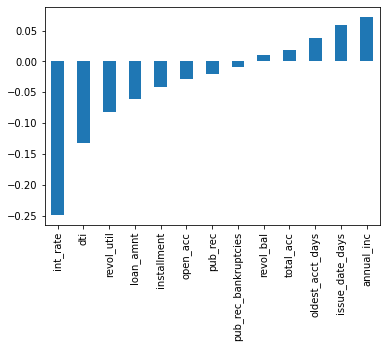

In [144]:
df_clean.corr()['result'].sort_values()[:-1].plot(kind='bar');

In [160]:
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,395767.0,14107.787284,8352.361771,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,395767.0,13.639987,4.472061,5.32,10.49,13.33,16.49,30.99
installment,395767.0,431.656306,250.536545,16.08,250.33,375.43,567.16,1533.81
annual_inc,395767.0,73481.797510,44450.678168,2500.00,45000.00,64000.00,90000.00,600000.00
dti,395767.0,17.357643,8.135883,0.00,11.30,16.91,22.99,189.90
open_acc,395767.0,11.310233,5.136927,0.00,8.00,10.00,14.00,90.00
pub_rec,395767.0,0.177852,0.508776,0.00,0.00,0.00,0.00,24.00
revol_bal,395767.0,15791.026493,19738.074242,0.00,6024.00,11179.00,19609.00,867528.00
revol_util,395767.0,53.793423,24.403713,0.00,35.90,54.80,72.90,153.00
total_acc,395767.0,25.411320,11.884623,2.00,17.00,24.00,32.00,151.00


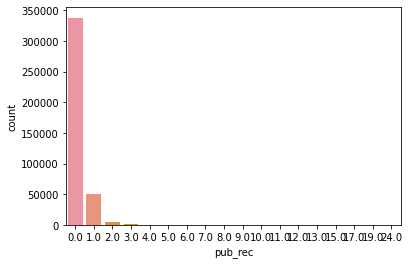

In [154]:
sns.countplot(data=df_clean, x='pub_rec');

In [153]:
df_clean['pub_rec'].nlargest(25)

252609    24.0
58160     19.0
112113    19.0
150599    17.0
355978    15.0
90368     13.0
162554    13.0
215994    13.0
271947    13.0
219965    12.0
234379    12.0
344043    12.0
364693    12.0
16526     11.0
45236     11.0
116628    11.0
145352    11.0
226097    11.0
290689    11.0
346327    11.0
370019    11.0
13183     10.0
57792     10.0
58306     10.0
103446    10.0
Name: pub_rec, dtype: float64

In [152]:
df_clean = df_clean[ df_clean['pub_rec'] < 40 ]

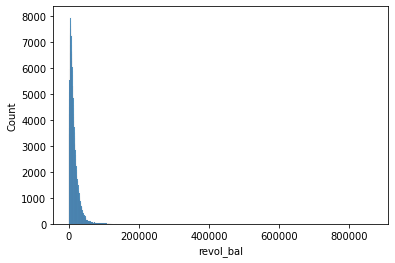

In [159]:
sns.histplot(data=df_clean, x='revol_bal');

In [157]:
df_clean = df_clean[ df_clean['revol_bal'] < 1000000 ]

In [158]:
df_clean['revol_bal'].nlargest(25)

238815    867528.0
134064    814300.0
181072    744190.0
241218    693471.0
103794    690987.0
385116    669560.0
378843    669257.0
141054    664894.0
318130    661711.0
151237    658548.0
367513    654134.0
163724    643871.0
343601    626102.0
79106     624356.0
30330     617838.0
180664    607891.0
37001     605627.0
12919     605063.0
372793    576771.0
288601    570842.0
395114    568659.0
129256    563624.0
135955    561634.0
202013    555673.0
210465    555597.0
Name: revol_bal, dtype: float64

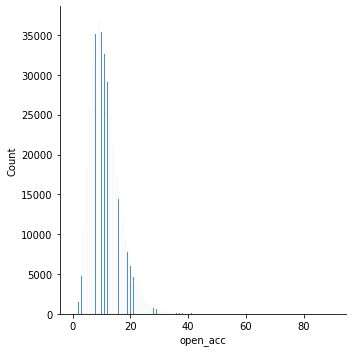

In [162]:
sns.displot(data=df_clean, x='open_acc');

### Create Dummy Variables

In [179]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395767 entries, 0 to 395771
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395767 non-null  float64
 1   term                  395767 non-null  object 
 2   int_rate              395767 non-null  float64
 3   installment           395767 non-null  float64
 4   grade                 395767 non-null  object 
 5   sub_grade             395767 non-null  object 
 6   emp_length            395767 non-null  object 
 7   home_ownership        395767 non-null  object 
 8   annual_inc            395767 non-null  float64
 9   verification_status   395767 non-null  object 
 10  loan_status           395767 non-null  object 
 11  purpose               395767 non-null  object 
 12  dti                   395767 non-null  float64
 13  open_acc              395767 non-null  float64
 14  pub_rec               395767 non-null  float64
 15  

In [178]:
df_clean['term'].unique()
df_clean['grade'].unique()
df_clean['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [177]:
df_clean['term'].unique()
df_clean['initial_list_status'].unique()
df_clean['purpose'].unique()
# df_clean['verification_status'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [168]:
df_clean.drop('issue_d', axis=1, inplace=True)

In [169]:
df_clean.drop('result', axis=1, inplace=True)

In [170]:
df_clean.drop('oldest_acct', axis=1, inplace=True)

In [171]:
df_clean.drop('issue_date', axis=1, inplace=True)

In [175]:
df_clean.drop('earliest_cr_line', axis=1, inplace=True)

In [180]:
df_clean.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'initial_list_status',
       'application_type'],
      dtype='object')

In [181]:
dummy_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status',
       'application_type']

In [183]:
df_clean[dummy_cols]

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,application_type
0,36 months,B,B4,10+ years,RENT,Not Verified,vacation,w,INDIVIDUAL
1,36 months,B,B5,4 years,MORTGAGE,Not Verified,debt_consolidation,f,INDIVIDUAL
2,36 months,B,B3,< 1 year,RENT,Source Verified,credit_card,f,INDIVIDUAL
3,36 months,A,A2,6 years,RENT,Not Verified,credit_card,f,INDIVIDUAL
4,60 months,C,C5,9 years,MORTGAGE,Verified,credit_card,f,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...
395767,60 months,B,B4,2 years,RENT,Source Verified,debt_consolidation,w,INDIVIDUAL
395768,36 months,C,C1,5 years,MORTGAGE,Source Verified,debt_consolidation,f,INDIVIDUAL
395769,36 months,B,B1,10+ years,RENT,Verified,debt_consolidation,f,INDIVIDUAL
395770,60 months,C,C2,10+ years,MORTGAGE,Verified,debt_consolidation,f,INDIVIDUAL


In [184]:
df_dummies = pd.get_dummies(df_clean[dummy_cols], drop_first=True)
df_dummies

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395767,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
395768,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
395769,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
395770,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [185]:
# check correlation
# df_clean[dummy_cols]

In [186]:
df_clean.select_dtypes(exclude=['object']).columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'oldest_acct_days', 'issue_date_days'],
      dtype='object')

In [187]:
numerical_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'oldest_acct_days', 'issue_date_days']

In [188]:
df_numerical = df_clean[numerical_cols]
df_numerical

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,oldest_acct_days,issue_date_days
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,9711,731
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,0.0,4567,731
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,3441,731
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,3775,792
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,0.0,6516,1371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395767,10000.0,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0.0,4444,458
395768,21000.0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,0.0,3987,700
395769,5000.0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,0.0,7246,1188
395770,21000.0,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,0.0,9558,1614


In [189]:
df_final = pd.concat([df_clean['loan_status'], df_numerical, df_dummies], axis=1)
df_final

,loan_status,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,Fully Paid,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,0,0,0,1,0,1,1,0
1,Fully Paid,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,0,0,0,0,0,0,0,0,1,0
2,Fully Paid,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,0,0,0,0,0,0,0,0,1,0
3,Fully Paid,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,1,0
4,Charged Off,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395767,Fully Paid,10000.0,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,...,0,0,0,0,0,0,0,1,1,0
395768,Fully Paid,21000.0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,...,0,0,0,0,0,0,0,0,1,0
395769,Fully Paid,5000.0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,...,0,0,0,0,0,0,0,0,1,0
395770,Fully Paid,21000.0,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,...,0,0,0,0,0,0,0,0,1,0


In [190]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395767 entries, 0 to 395771
Data columns (total 87 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_status                          395767 non-null  object 
 1   loan_amnt                            395767 non-null  float64
 2   int_rate                             395767 non-null  float64
 3   installment                          395767 non-null  float64
 4   annual_inc                           395767 non-null  float64
 5   dti                                  395767 non-null  float64
 6   open_acc                             395767 non-null  float64
 7   pub_rec                              395767 non-null  float64
 8   revol_bal                            395767 non-null  float64
 9   revol_util                           395767 non-null  float64
 10  total_acc                            395767 non-null  float64
 11  pub_rec_bankr

In [191]:
# SAVE FINAL PRE-PROCESSED DATA SET
df_final.to_csv('./data/lending_club_clean_dummies.csv', index=False)

### Balancing the Data Set

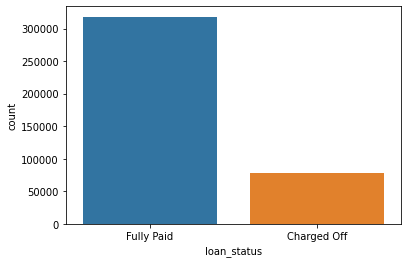

In [193]:
sns.countplot(data=df_final, x='loan_status');

In [198]:
df_final.groupby('loan_status').count()['loan_amnt']

loan_status
Charged Off     77636
Fully Paid     318131
Name: loan_amnt, dtype: int64

In [199]:
df0 = df_final[ df_final['loan_status'] == 'Charged Off' ]
df1 = df_final[ df_final['loan_status'] == 'Fully Paid' ]

In [201]:
N = len(df0)

In [204]:
df_temp = df1.sample(n=N, random_state=101)

In [209]:
df_new = pd.concat([df0, df_temp], axis=0)
df_new = df_new.sample(frac=1)
df_new.reset_index(inplace=True, drop=True)
df_new

,loan_status,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,Fully Paid,15000.0,10.99,491.01,55000.0,7.81,6.0,0.0,11963.0,84.8,...,0,0,0,0,0,0,0,0,1,0
1,Fully Paid,11000.0,20.99,297.53,60000.0,24.19,18.0,0.0,13129.0,54.7,...,0,0,0,0,0,0,0,1,1,0
2,Charged Off,16000.0,15.59,385.62,72000.0,4.18,14.0,0.0,10461.0,21.1,...,0,0,0,0,0,0,0,1,1,0
3,Charged Off,13200.0,10.99,286.94,38000.0,15.54,17.0,0.0,11953.0,54.8,...,0,0,0,0,0,0,0,1,1,0
4,Fully Paid,12000.0,6.99,370.48,56000.0,28.72,17.0,0.0,9325.0,18.1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155267,Charged Off,14000.0,12.29,313.48,45000.0,31.07,10.0,1.0,2225.0,33.2,...,0,0,0,0,0,0,0,1,1,0
155268,Fully Paid,7200.0,8.90,228.63,93000.0,24.57,10.0,0.0,23514.0,68.6,...,0,0,0,0,0,0,0,0,1,0
155269,Fully Paid,14775.0,17.99,534.08,42000.0,24.86,24.0,0.0,12763.0,46.4,...,0,0,0,0,0,0,0,0,1,0
155270,Charged Off,24000.0,15.59,578.42,83000.0,25.20,19.0,0.0,48766.0,80.5,...,0,0,0,0,0,0,0,1,1,0


In [210]:
df_new.to_csv('./data/lending_club_clean_dummies_balanced.csv', index=False)

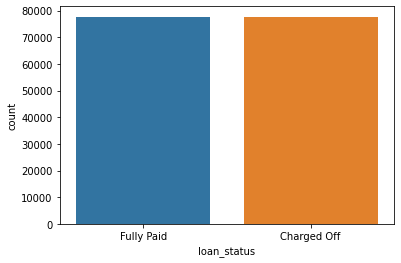

In [212]:
sns.countplot(data=df_new, x='loan_status');

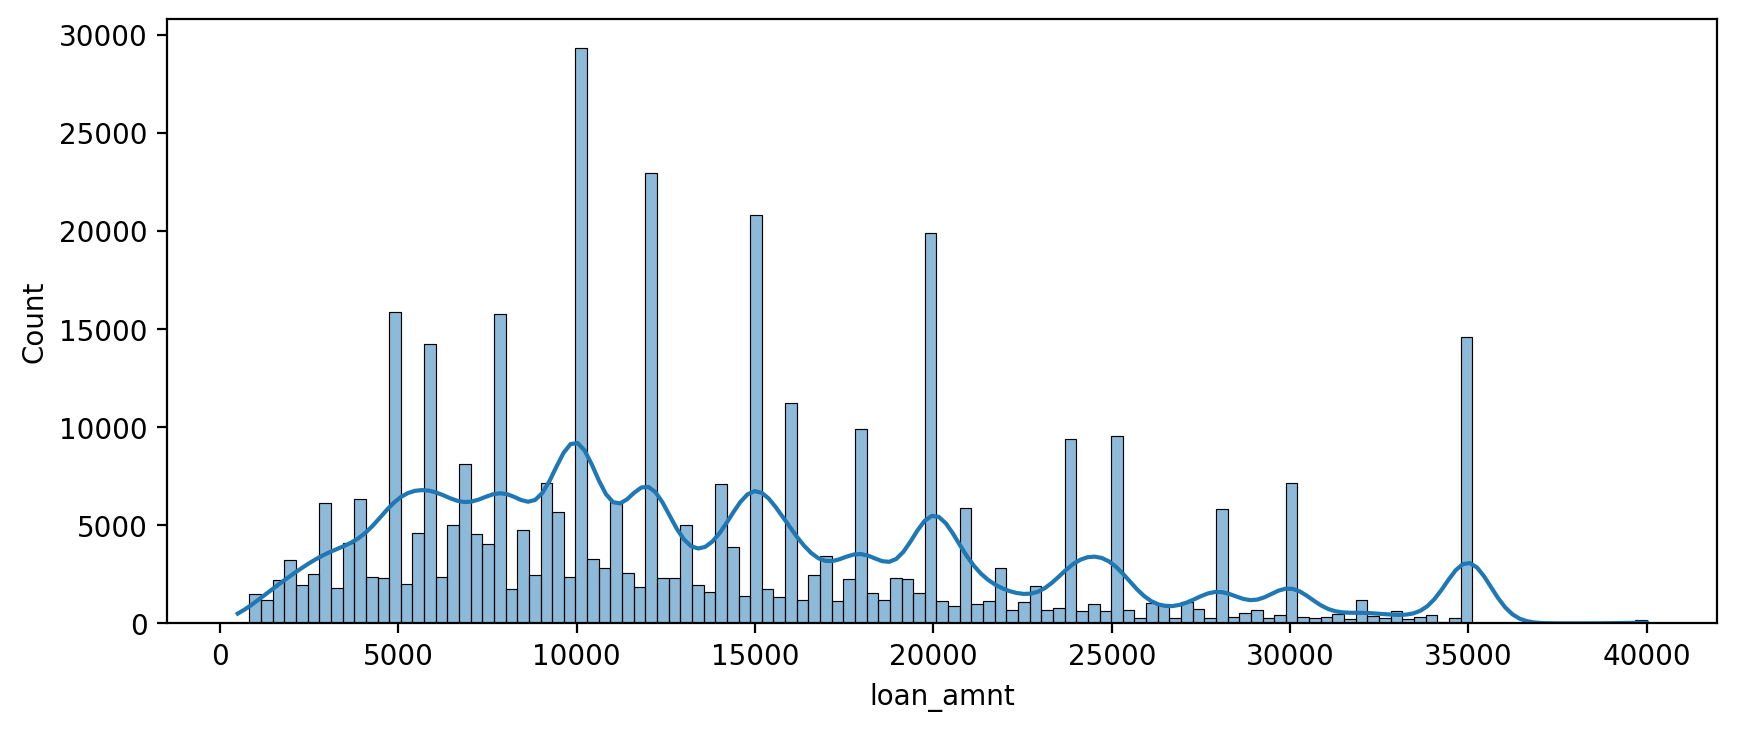

In [214]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=df_final['loan_amnt'], kde=True);

In [216]:
# sns.heatmap(df_temp)
df_temp

,loan_status,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
188479,Fully Paid,18000.0,6.03,547.84,100000.0,22.04,9.0,0.0,16636.0,40.6,...,0,0,0,0,0,0,0,0,1,0
252104,Fully Paid,10000.0,15.31,348.18,45000.0,24.95,17.0,0.0,4019.0,9.2,...,0,0,1,0,0,0,0,0,1,0
177148,Fully Paid,4950.0,19.05,181.58,18000.0,20.47,5.0,0.0,5998.0,70.6,...,0,0,0,0,0,0,0,0,1,0
200233,Fully Paid,9500.0,5.42,190.01,120000.0,16.88,9.0,0.0,44765.0,17.0,...,0,0,0,0,0,0,0,0,1,0
228737,Fully Paid,3200.0,15.61,111.89,14000.0,17.84,4.0,0.0,7684.0,93.7,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206967,Fully Paid,35000.0,13.99,1196.05,200000.0,16.82,26.0,0.0,37448.0,54.6,...,0,0,0,0,0,0,0,0,1,0
205825,Fully Paid,28000.0,7.26,867.90,100000.0,14.06,8.0,0.0,35583.0,76.9,...,0,0,0,0,0,0,0,1,1,0
255262,Fully Paid,6250.0,15.80,219.12,23000.0,34.59,14.0,0.0,16299.0,80.3,...,0,0,0,0,0,0,0,1,1,0
48431,Fully Paid,10000.0,6.68,307.31,72000.0,20.27,14.0,0.0,4542.0,8.8,...,0,0,0,0,0,0,0,0,1,0
